----
# Laboratorium 10 - Filtry analogowe, część 1

----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskie

----
## 0. Zagadnienia do opanowania przed zajęciami
----
### 0.1. Obsługa języka Python oraz bibliotek `numpy`, `matplotlib`, `imageio` oraz `scipy.signal`.
### 0.2. Przypomnienie wiadomości o filtrach analogowych
### 0.3. Moduł transmitancji i tłumienie
### 0.4.  Gabaryty filtru
### 0.5.  Aproksymacje Butterwortha, Czebyszewa (1 i 2 rodzaju) i Cauera (eliptyczna)


In [19]:
%matplotlib inline
import sympy 
import scipy.signal 
import numpy as np
import matplotlib.pyplot as plt 



----

### Zadanie 1

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Butterwortha   
    - rząd filtru n (dla n od 1 do 5)  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedz:  
    - wykorzystaj funkcję `scipy.signal.butter`, pamiętaj aby zaprojektować filtr analogowy  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

n1 L=5.988229988375398
n2 L=12.040792697110916
n3 L=18.061795464754738
n4 L=24.082399609858697
n5 L=30.102999565964254


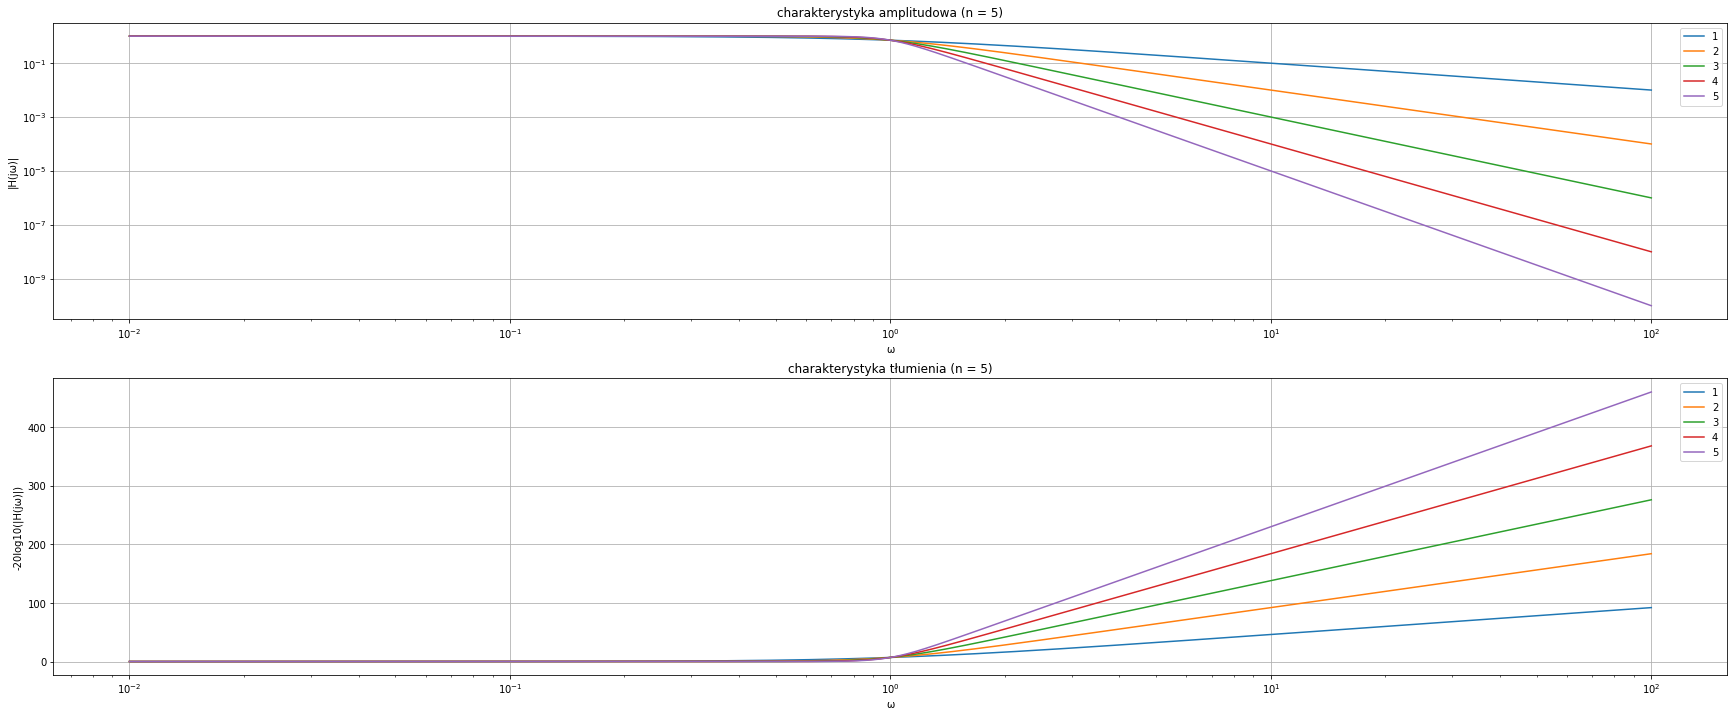

In [20]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    B, A=scipy.signal.butter(N=i,Wn=wp,btype='low',analog=True)
    #calculate transmitance samples and magnitude characteristic
    H=scipy.signal.freqs(B,A,w)[1]
    M=np.abs(H, dtype=np.double)
    #calculate Attenuation 
    L=-20*np.log(M)
    #calculate attenuation per octave
    w_oct=np.array([10,20])
    H_oct=np.polyval(B,w_oct*1j)/np.polyval(A,w_oct*1j)
    L_oct=-20*np.log10(np.abs(H_oct))
    print('n'+str(i)+' L='+str(L_oct[1]-L_oct[0]))
    #display magnitude characteristic
    axs[0].loglog(w,M,label=str(i))
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend()
    axs[1].semilogx(w,L,label=str(i))
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend()

### Zadanie 2

Zaprojektować 5 dolnoprzepustowych filtrów (analogowych):
    - aproksymacji Czebyszewa I rodzaju   
    - rząd filtru n (dla n od 1 do 5)  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - pulsacja graniczna ω=1 rad/s  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie) oraz tłumienia (na jednym, innym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

Podpowiedź:  
    - wykorzystaj funkcję `scipy.signal.cheby1`, pamiętaj aby zaprojektować filtr analogowy, maksymalne tętnienie (rp, ripple) oznacza  maksymalne tłumienie w paśmie przepustowym  
    - do wyznaczenia próbek transmitancji uzyj funkcji `scipy.signal.freqs`

n1 L=5.897759498003122
n2 L=12.073476803219634
n3 L=18.110887053015404
n4 L=24.147850978903975
n5 L=30.184813727382988


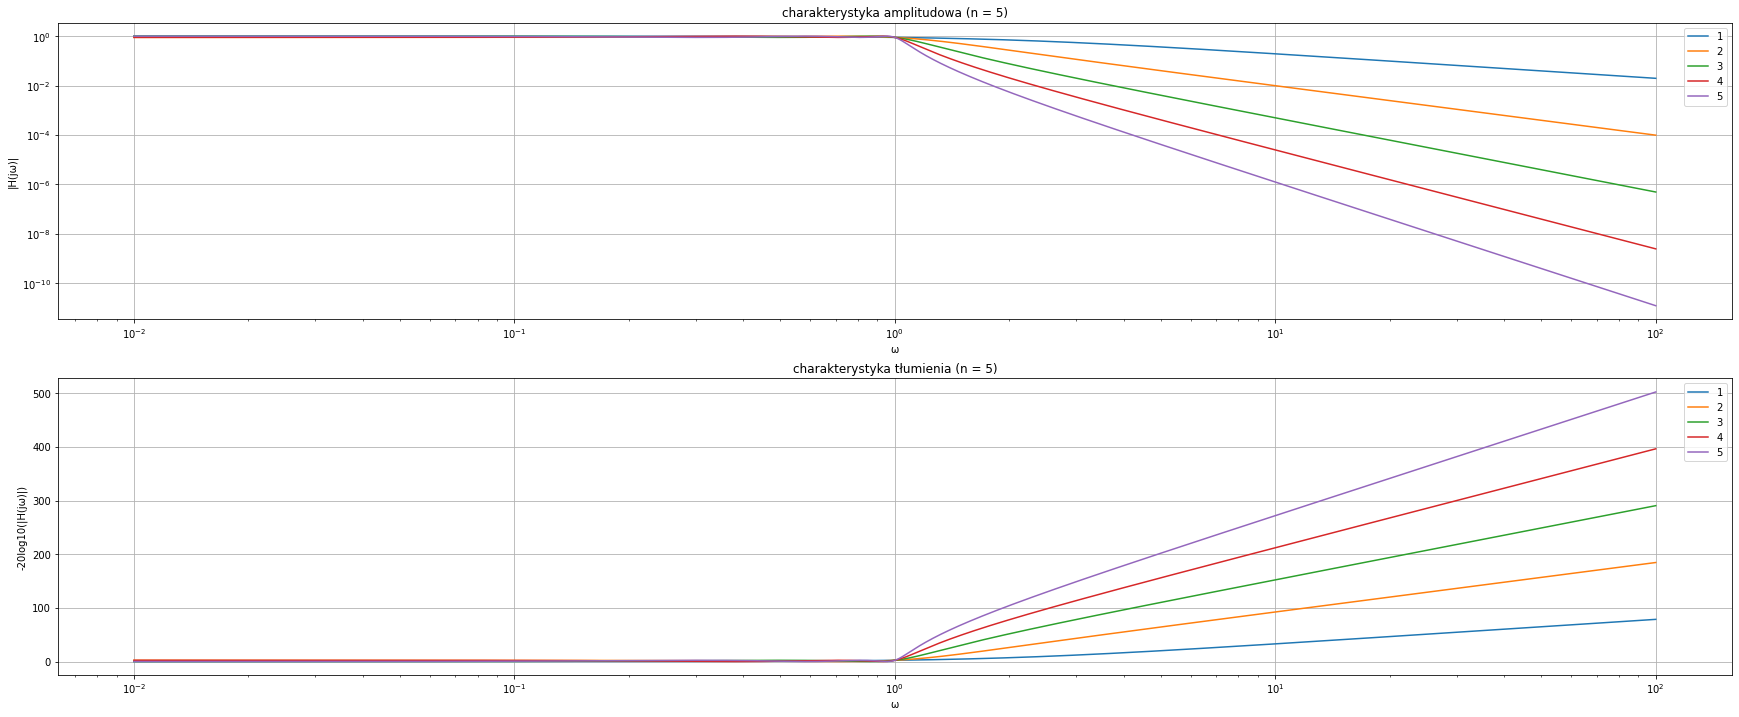

In [21]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[6*n,12])    
#log w vector
w = np.logspace(-2,2,10000)

for i in range(1,n+1):    
    #design filter
    B, A=scipy.signal.cheby1(N=i,rp=1,Wn=wp,btype='low',analog=True)
    #calculate transmitance samples and magnitude characteristic
    H=scipy.signal.freqs(B,A,w)[1]
    M=np.abs(H, dtype=np.double)
    #calculate Attenuation 
    L=-20*np.log(M)
    #calculate attenuation per octave
    w_oct=np.array([10,20])
    H_oct=np.polyval(B,w_oct*1j)/np.polyval(A,w_oct*1j)
    L_oct=-20*np.log10(np.abs(H_oct))
    print('n'+str(i)+' L='+str(L_oct[1]-L_oct[0]))
    #display magnitude characteristic
    axs[0].loglog(w,M,label=str(i))
    axs[0].set_title("charakterystyka amplitudowa (n = %d)"%(i))
    axs[0].set_xlabel("ω")
    axs[0].set_ylabel("|H(jω)|")
    axs[0].grid()
    axs[0].legend()
    axs[1].semilogx(w,L,label=str(i))
    axs[1].set_title("charakterystyka tłumienia (n = %d)"%(i))
    axs[1].set_xlabel("ω")
    axs[1].set_ylabel("-20log10(|H(jω)|)")
    axs[1].grid()
    axs[1].legend()

### Zadanie 3  
Porównać charakterystyki amplitudowe i fazowe dla aproksymacji Butterwortha i Czebyszewa I rodzaju:
    - rząd filtru n = 5  
    - pulsacja graniczna ω=1 rad/s  
    - maksymalne tłumienie w pasmie przepustowym 1 dB (rp, ripple).  
    - wykreślić charakterystyki amplitudowe (na jednym wykresie)  
    - wykreślić charakterystyki fazowe (na jednym wykresie)  
    - odczytać z wykresu nachylenie charakterystyki amplitudowej w paśmie zaporowym  (dB/oct)

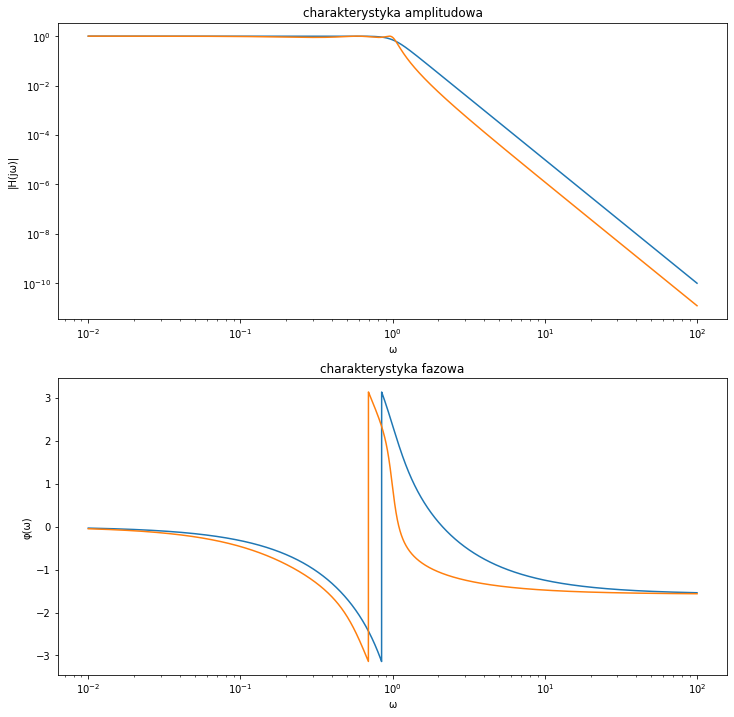

In [22]:
n  = 5
wp = 1
fig, axs = plt.subplots(2, 1, figsize=[12,12])    
#log w vector
w = np.logspace(-2,2,10000)

#Butterworth
#design filter
B, A = scipy.signal.butter(N=i, Wn=wp, btype='low',analog='True')
#calculate transmitance samples and magnitude characteristic
H=scipy.signal.freqs(B,A,w)[1]
M=np.abs(H, dtype=np.double)
#calculate phase 
phas = np.angle(H)
#display magnitude characteristic
axs[0].loglog(w, M)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w, phas)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()

#cheby
#design filter
BC, AC = scipy.signal.cheby1(N=i, rp=1, Wn=wp, btype='low',analog='True')
#calculate transmitance samples and magnitude characteristic
HC=scipy.signal.freqs(BC,AC,w)[1]
MC=np.abs(HC, dtype=np.double)
#calculate phase 
phasC = np.angle(HC)
#display magnitude characteristic
axs[0].loglog(w, MC) 
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("ω")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()
axs[1].semilogx(w, phasC)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("ω")
axs[1].set_ylabel("φ(ω)")
axs[1].grid()


### Zadanie 4

Wyznaczanie minimalnego wymaganego rzędu filtru:  
 ### gabaryty: 
 - a)   αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s  
 - b)   αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
### filtry:  
 - Butterwortha
 - Czebyszewa I rodzaju
 - Czebyszewa II rodzaju
 - Cauer (eliptyczny)

### Podpowiedź : 
 - użyj funkcji: `scipy.signal.buttord`, `scipy.signal.cheb1ord`, `scipy.signal.cheb2ord`, `scipy.signal.ellipord`

In [23]:
# I - case
# αp= 3 dB, αs= 80 dB, ωp= 3 rad/s, ωs= 8 rad/s 
a_butt       = scipy.signal.buttord (wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)[0]
a_cheby1, w_n_cheby1    = scipy.signal.cheb1ord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)
a_cheby2, w_n_cheby2    = scipy.signal.cheb2ord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)
a_ellip, w_n_ellip      = scipy.signal.ellipord(wp = 3,ws = 8, gpass = 3, gstop = 80, analog=True)
print('Order of filters for given params a: Butterworth = %d, Cheby1 = %d, Cheby2  = %d, Ellip = %d'%(a_butt,a_cheby1,a_cheby2,a_ellip))
# II-nd case
# αp= 0,5 dB, αs= 100 dB, ωp= 2 rad/s, ωs= 3 rad/s
b_butt, w_n_butt        = scipy.signal.buttord (wp = 2,ws = 3, gpass = 0.1, gstop = 100, analog=True)
b_cheby1, w_n_cheby1    = scipy.signal.cheb1ord(wp = 2,ws = 3, gpass = 0.1, gstop = 100, analog=True)
b_cheby2, w_n_cheby2    = scipy.signal.cheb2ord(wp = 2,ws = 3, gpass = 0.1, gstop = 100, analog=True)
b_ellip, w_n_ellip      = scipy.signal.ellipord(wp = 2,ws = 3, gpass = 0.1, gstop = 100, analog=True)
print('Order of filters for given params b: Butterworth = %d, Cheby1 = %d, Cheby2  = %d, Ellip = %d'%(b_butt,b_cheby1,b_cheby2,b_ellip))


Order of filters for given params a: Butterworth = 10, Cheby1 = 7, Cheby2  = 7, Ellip = 5
Order of filters for given params b: Butterworth = 34, Cheby1 = 15, Cheby2  = 15, Ellip = 9


### Zadanie 5   

Korzystając z napisanej w zadaniu 5 funkcji powtórz zadania 1-4 dla filtru górnoprzepustowego.

### Podpowiedź 
- zmień parametr `btype` poszczególnych funkcji na "high"
- pamiętaj, aby zmienić pulsację przy wyznaczniu tłumienia na oktawę tak, aby obliczać je w obszarze zaporowym
 

### Zadanie 6 

Napisz funkcję:
 - wyliczającą rząd filtru dla danej aproksymacji 
 - projektującą filtr (transmitancja) 
 - wykreślanie charakterystyk amplitudowych filtrów wraz z liniami odpowiadającymi gabarytom filtrów 

#### Paniętaj, że dla filtru Czebyszewa II typu, funkcja projektująca transmitancję filtru przyjmuje wartość `ws` jako argument o nazwie `wn` (patrz dokumentacja)

Wyświetl filtry a) i b) z zadania 4 dla wszystkich aproksymacji (na jednym wykresie charakterystyki dla danych gabarytów)

In [24]:
def designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80) : 
    #find order and design filter
    
    #display characteristics
    
    return
designFilter(charType =  'butt',type = 'low', wp = 3,ws = 8, gpass = 3, gstop = 80)
